#### Introduction

In wine production process, the ingredients play a major role for determining the quality of wine. The wine experts judge wine quality based on the taste and impression of wine. In this project, we will predict the quality of wine based on the components that are in the wine. This dataset contains 1590 red wines with 12 features. The dataset can be downloaded from [kaggle.](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

Features information:
1.  fixed acidity = the level of fix acid in the wine
2.  volatile acidity = the level of acetic acid in the wine
3.  citric acid = the level of critic acid which give sour and crispiness
4.  residual sugar = natural grape sugars
5.  chlorides = a part component of volatile acidity
6.  free sulfur dioxide = unbound to compounds in the wine
7.  total sulfur dioxide = sum of binding and unbound form of SO2
8.  density = the density of water in wine
9.  pH  = describe how acidic or basics in wine from 0(very acidic) to 14(very basics)
10. sulphates = sulfur dioxide
11. alcohol = level of ethanol
12. quality = the quality of wine from 1 to 7: 1-3 = 'Poor', 4-5 = 'Good', 6-7 = 'Rich'

Objective: — To find out which feature is more effective for wine quality prediction.

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#### Load the dataset

In [2]:
data = pd.read_csv("winequality-red.csv")

#### Summarizing the dataset

In [13]:
# Dimension of dataset
data.shape

(1599, 12)

We can see that the dataset has 1599 instances and 12 features.

In [14]:
# Peek at the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
# Statistical 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see that all of the numerical values have the different scale, ranges between 0 and 289.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In this dataset, we have total 1599 instances and 11 features. The 12th feature is the class label and is integer. All the 11 features are in float and are in numbercial variables. There are no missing values in this dataset. That means we proceed further exploratory analysis.

In [18]:
# quality distribution
data.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

We can see that each quality has the different number of instances.

#### Data Visualization

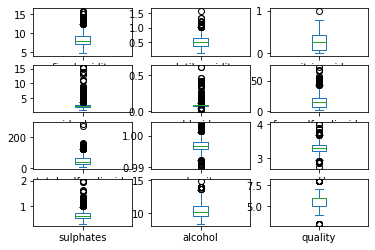

<Figure size 432x288 with 0 Axes>

In [25]:
data.plot(kind='box',subplots=True, layout=(4,3),sharex=False,sharey=False)
plt.show()
plt.tight_layout()